In [1]:
#Author Maria Giselle Fernandez-Godino
#email: mariagisellefernandez@gmail.com

In [2]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, Bidirectional
from sklearn.model_selection import train_test_split

In [3]:
n=100000
m=100
total=n+m
delta_t=0.01
s=5

def lorenz(x, y, z, s=10, r=28, b=2.667):
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    x_dot = s*(y-x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

# Need one more for the initial values
xs = np.empty(total + 1)
ys = np.empty(total + 1)
zs = np.empty(total + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(total):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * delta_t)
    ys[i + 1] = ys[i] + (y_dot * delta_t)
    zs[i + 1] = zs[i] + (z_dot * delta_t)

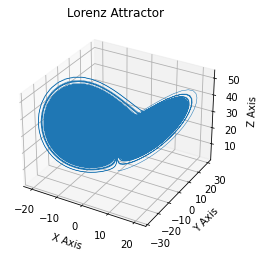

In [4]:
# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [5]:
# Scaled to work with Neural networks.
xs_scaled = (xs-np.min(xs))/(np.max(xs)-np.min(xs))
ys_scaled = (ys-np.min(ys))/(np.max(ys)-np.min(ys))
zs_scaled = (zs-np.min(zs))/(np.max(zs)-np.min(zs))

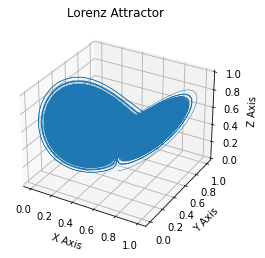

In [6]:
# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs_scaled, ys_scaled, zs_scaled, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [7]:
xs1_train = []
xs2_train = []
for i in range(s,n):
    xs1_train.append(xs_scaled[i-s:i])
    xs2_train.append(xs_scaled[i])
xs1_train, xs2_train = np.array(xs1_train), np.array(xs2_train)

In [8]:
ys1_train = []
ys2_train = []
for i in range(s,n):
    ys1_train.append(ys_scaled[i-s:i])
    ys2_train.append(ys_scaled[i])
ys1_train, ys2_train = np.array(ys1_train), np.array(ys2_train)

In [9]:
zs1_train = []
zs2_train = []
for i in range(s,n):
    zs1_train.append(zs_scaled[i-s:i])
    zs2_train.append(zs_scaled[i])
zs1_train, zs2_train = np.array(zs1_train), np.array(zs2_train)

In [10]:
print(xs2_train[-1])
print(ys2_train[-1])
print(zs2_train[-1])

0.3763261908730003
0.3639158976385806
0.3167527295849813


In [11]:
def SimpleRNN_model(input_):
    print('encoder')
    print(input_.shape)
    x = SimpleRNN(128,input_shape=(s,3))(input_)
    print(x.shape)
    output = Dense(3)(x)
    print(output.shape)
    return output

In [12]:
input_ = tensorflow.keras.Input(shape=(s,3))
SimpleRNN_model = tensorflow.keras.Model(input_, SimpleRNN_model(input_))

encoder
(None, 5, 3)
(None, 128)
(None, 3)


In [13]:
opt = tensorflow.keras.optimizers.Adam()
SimpleRNN_model.compile(optimizer=opt, loss='mse')
SimpleRNN_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5, 3)]            0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               16896     
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 17,283
Trainable params: 17,283
Non-trainable params: 0
_________________________________________________________________


In [14]:
X_train=np.concatenate((xs1_train.reshape(-1,s,1), ys1_train.reshape(-1,s,1), zs1_train.reshape(-1,s,1)), axis=2)
y_train=np.concatenate((xs2_train.reshape(-1,1),ys2_train.reshape(-1,1),zs2_train.reshape(-1,1)),axis=1)

In [15]:
X_train.shape

(99995, 5, 3)

In [16]:
y_train.shape

(99995, 3)

In [17]:
epochs=20
SimpleRNN_model.fit(X_train,y_train,epochs=epochs,batch_size=128)

Epoch 1/20
782/782 [==============================] - 3s 3ms/step - loss: 0.0057
Epoch 2/20
782/782 [==============================] - 2s 3ms/step - loss: 3.7859e-05
Epoch 3/20
782/782 [==============================] - 2s 3ms/step - loss: 3.4783e-05
Epoch 4/20
782/782 [==============================] - 2s 3ms/step - loss: 2.7779e-05
Epoch 5/20
782/782 [==============================] - 2s 3ms/step - loss: 2.3362e-05
Epoch 6/20
782/782 [==============================] - 2s 3ms/step - loss: 2.2344e-05
Epoch 7/20
782/782 [==============================] - 2s 3ms/step - loss: 1.5549e-05
Epoch 8/20
782/782 [==============================] - 2s 3ms/step - loss: 1.1315e-05
Epoch 9/20
782/782 [==============================] - 2s 3ms/step - loss: 1.0319e-05
Epoch 10/20
782/782 [==============================] - 2s 3ms/step - loss: 9.9026e-06
Epoch 11/20
782/782 [==============================] - 2s 3ms/step - loss: 9.0196e-06
Epoch 12/20
782/782 [==============================] - 2s 3ms/step 

In [18]:
SimpleRNN_model.save('SimpleRNN_model.h5')

In [19]:
import tensorflow as tf
SimpleRNN_model = tf.keras.models.load_model('SimpleRNN_model.h5')

In [20]:
y_train_pred=SimpleRNN_model.predict(X_train)

In [21]:
y_train_pred.shape

(99995, 3)

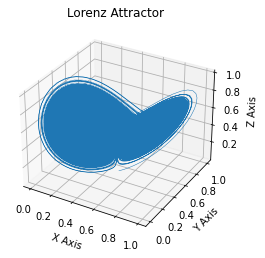

In [22]:
# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(y_train_pred[:,0], y_train_pred[:,1], y_train_pred[:,2], lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

(99900.0, 100000.0)

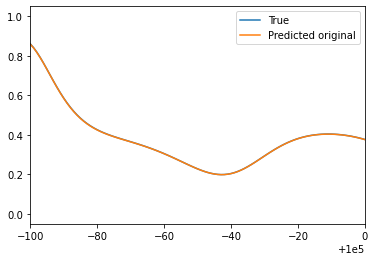

In [23]:
plt.plot(np.linspace(0,n,n),xs_scaled[:n],label='True')
plt.plot(np.linspace(s,n,n-s),y_train_pred[:,0],label='Predicted original')
plt.legend()
plt.xlim([99900,100000])

In [24]:
np.linspace(s,len(xs_scaled),len(xs_scaled)-s-1).shape

(100095,)

(99900.0, 100000.0)

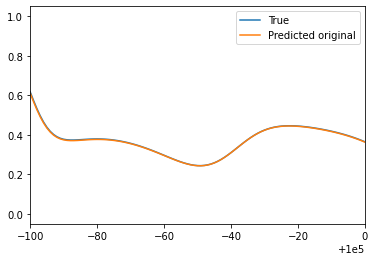

In [25]:
plt.plot(np.linspace(0,n,n),ys_scaled[:n],label='True')
plt.plot(np.linspace(s,n,n-s),y_train_pred[:,1],label='Predicted original')
plt.legend()
#plt.xlim([0,100])
plt.xlim([99900,100000])

(99900.0, 100000.0)

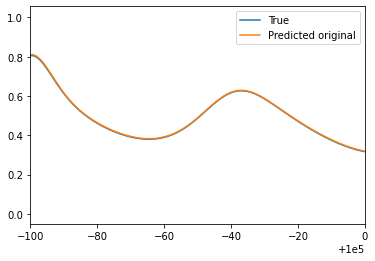

In [26]:
plt.plot(np.linspace(0,n,n),zs_scaled[:n],label='True')
plt.plot(np.linspace(s,n,n-s),y_train_pred[:,2],label='Predicted original')
plt.legend()
#plt.xlim([0,200])
plt.xlim([99900,100000])

## Predicting the future

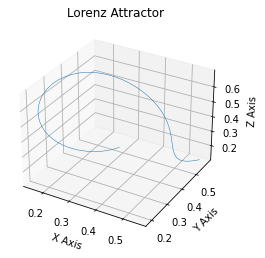

In [27]:
# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs_scaled[n:n+m], ys_scaled[n:n+m], zs_scaled[n:n+m], lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [28]:
print(xs_scaled[n:n+m][0])
print(ys_scaled[n:n+m][0])
print(zs_scaled[n:n+m][0])

0.37107601363477277
0.35644184001462026
0.3140319416022453


In [29]:
xs1_f = []; xs2_f = []
ys1_f = []; ys2_f = []
zs1_f = []; zs2_f = []

xs1_f.append(X_train[-1,:,0])
ys1_f.append(X_train[-1,:,1])
zs1_f.append(X_train[-1,:,2])

yf=[]

for j in range(m):
    X1 = np.concatenate((xs1_f[-1].reshape(-1,s,1), ys1_f[-1].reshape(-1,5,1), zs1_f[-1].reshape(-1,5,1)), axis=2)
    y_f = SimpleRNN_model.predict(X1)
    xs2_f.append(y_f[0][0]); ys2_f.append(y_f[0][1]); zs2_f.append(y_f[0][2])
    a=np.hstack((X1[0,1:,:].reshape(1,4,3),y_f[-1].reshape(1,1,3)))   
    xs1_f.append(a[0][:,0]); ys1_f.append(a[0][:,1]); zs1_f.append(a[0][:,2])


In [30]:
print(xs2_f[0])
print(ys2_f[0])
print(zs2_f[0])

0.3757863
0.36232954
0.3191554


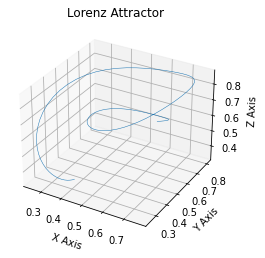

In [31]:
# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs2_f, ys2_f, zs2_f, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

(0.0, 100.0)

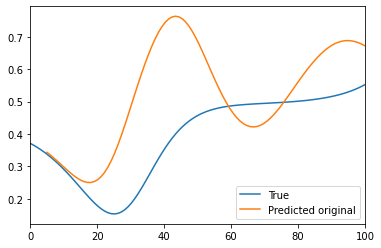

In [32]:
plt.plot(np.linspace(0,m,m),xs_scaled[n:n+m],label='True')
plt.plot(np.linspace(s,m,m-s),xs2_f[s:],label='Predicted original')
plt.legend()
plt.xlim([0,100])

(0.0, 100.0)

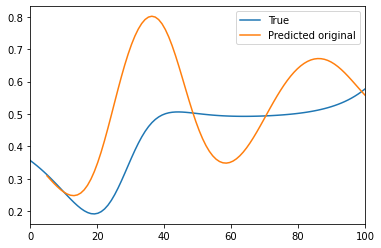

In [33]:
plt.plot(np.linspace(0,m,m),ys_scaled[n:n+m],label='True')
plt.plot(np.linspace(s,m,m-s),ys2_f[s:],label='Predicted original')
plt.legend()
plt.xlim([0,100])

(0.0, 100.0)

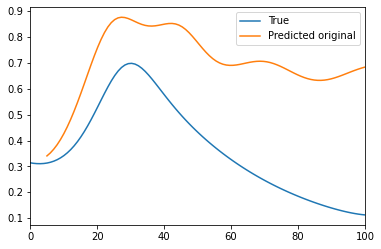

In [34]:
plt.plot(np.linspace(0,m,m),zs_scaled[n:n+m],label='True')
plt.plot(np.linspace(s,m,m-s),zs2_f[s:],label='Predicted original')
plt.legend()
plt.xlim([0,100])